In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error

In [2]:
data =pd.read_csv("../Data/final/Anuradapura_demand.csv",index_col="Month",parse_dates=["Month"])
data.head()

,Demand,Temp_Avg,Temp_Max,Temp_Min,Rainfall_Avg,HumidityDay,HumidityNight
Month,,,,,,,
2015-01-01,13.355776,26.7,31.3,22.2,15.8,69,92.0
2015-02-01,12.717279,26.8,31.2,22.3,129.8,71,92.0
2015-03-01,13.780719,28.7,33.6,23.7,26.0,64,89.0
2015-04-01,14.926229,29.2,34.1,24.2,288.2,68,91.0
2015-05-01,15.463069,29.3,33.5,25.1,264.7,73,91.0


In [3]:
data.describe(include='all')

,Demand,Temp_Avg,Temp_Max,Temp_Min,Rainfall_Avg,HumidityDay,HumidityNight
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,83.000000
mean,18.291453,28.398810,32.642857,24.151190,114.367857,69.238095,90.397590
std,3.224086,1.349296,1.755356,1.193203,117.104345,6.399584,3.083946
min,8.302096,25.600000,28.600000,20.900000,0.000000,57.000000,83.000000
25%,16.197128,27.150000,31.275000,23.475000,18.500000,65.000000,88.000000
50%,18.773882,28.800000,33.000000,24.350000,73.950000,68.500000,91.000000
75%,20.547705,29.400000,33.925000,25.100000,170.975000,73.250000,92.000000
max,30.408826,31.100000,36.400000,25.900000,463.100000,84.000000,96.000000


In [4]:
print(data.shape)
print(data.info())


(84, 7)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2015-01-01 to 2021-12-01
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Demand         84 non-null     float64
 1   Temp_Avg       84 non-null     float64
 2   Temp_Max       84 non-null     float64
 3   Temp_Min       84 non-null     float64
 4   Rainfall_Avg   84 non-null     float64
 5   HumidityDay    84 non-null     int64  
 6   HumidityNight  83 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 5.2 KB
None


In [5]:
data.isnull().sum() #return true/ false. If ture , its a missing place. If false, it contains a values.

Demand           0
Temp_Avg         0
Temp_Max         0
Temp_Min         0
Rainfall_Avg     0
HumidityDay      0
HumidityNight    1
dtype: int64

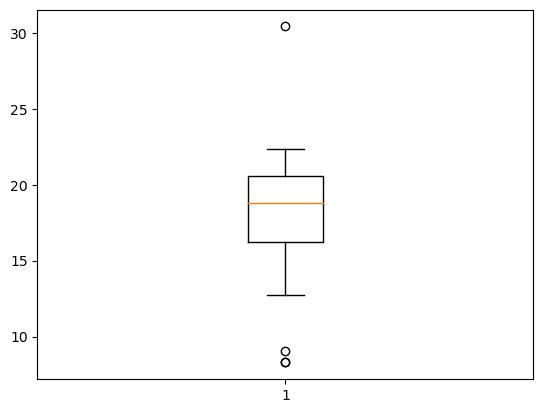

In [6]:
plt.boxplot(data["Demand"])  #finding outliers
plt.show()

<AxesSubplot:>

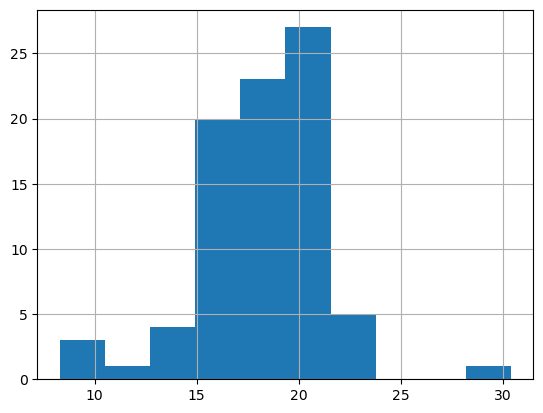

In [7]:
data.Demand.hist()

<AxesSubplot:xlabel='Month'>

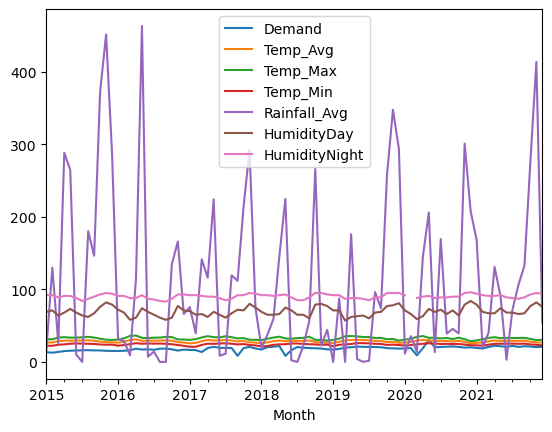

In [8]:
data.plot()   # visualize the data

Test for stationarity,

In [9]:
#H0:it is not stationary
#H1:it is stationary

from statsmodels.tsa.stattools import adfuller

def adfuller_test(Demand):
    result=adfuller(Demand)
    labels=['ADF test statistics','p-values','lags used','number of observations used']
    for value,lable in zip(result,labels):
        print(lable+ ' : ' +str(value))
    if result[1] <= 0.05:
        print("strong evedence against the null hypothesis,rehject the null hypothesis.Its stationary")
    else:
        print("weak evidence aginst for null hypothesis,indicating it's not stationary")

In [10]:
adfuller_test(data['Demand'])

ADF test statistics : -1.1119295014960004
p-values : 0.7102911867445969
lags used : 9
number of observations used : 74
weak evidence aginst for null hypothesis,indicating it's not stationary


In [11]:
data["Electricty demand first difference"] =data['Demand']- data['Demand'].shift(1) 
# data["Electricty seasonal demand first difference"] =data['Demand']- data['Demand'].shift(12)  because of seasonality


In [12]:
data.head(20)

,Demand,Temp_Avg,Temp_Max,Temp_Min,Rainfall_Avg,HumidityDay,HumidityNight,Electricty demand first difference
Month,,,,,,,,
2015-01-01,13.355776,26.7,31.3,22.2,15.8,69,92.0,NaN
2015-02-01,12.717279,26.8,31.2,22.3,129.8,71,92.0,-0.638497
2015-03-01,13.780719,28.7,33.6,23.7,26.0,64,89.0,1.063440
2015-04-01,14.926229,29.2,34.1,24.2,288.2,68,91.0,1.145510
2015-05-01,15.463069,29.3,33.5,25.1,264.7,73,91.0,0.536840
2015-06-01,15.668344,29.4,33.4,25.4,10.1,68,88.0,0.205275
2015-07-01,16.077157,29.7,34.0,25.3,0.0,64,84.0,0.408813
2015-08-01,16.176547,29.8,34.6,25.0,180.2,62,87.0,0.099390
2015-09-01,15.887312,29.1,33.6,24.7,146.4,67,90.0,-0.289235


In [13]:
adfuller_test(data['Electricty demand first difference'].dropna())

ADF test statistics : -6.033009049162687
p-values : 1.4033258681841313e-07
lags used : 8
number of observations used : 74
strong evedence against the null hypothesis,rehject the null hypothesis.Its stationary


<AxesSubplot:xlabel='Month'>

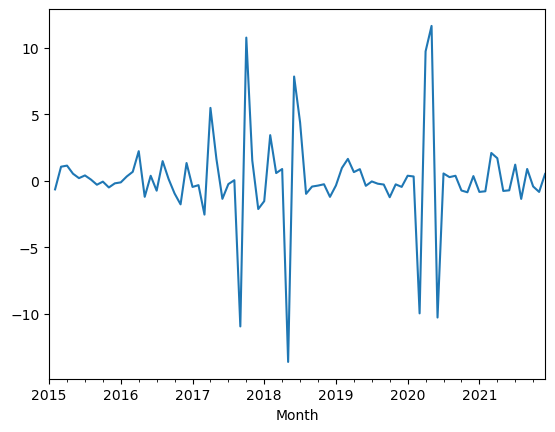

In [14]:
data['Electricty demand first difference'].plot()

C:\Users\Shani\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


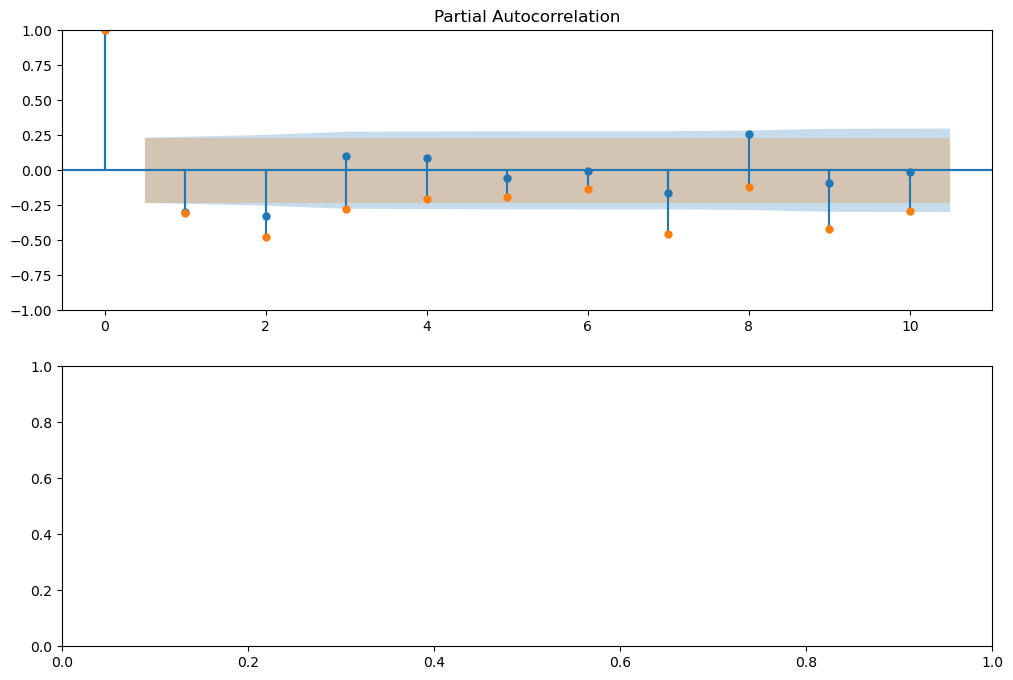

In [15]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

# Draw Plot
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig =sm.graphics.tsa.plot_acf(data['Electricty demand first difference'].iloc[13:],lags=10,ax=ax1)
ax2=fig.add_subplot(212)
fig =sm.graphics.tsa.plot_pacf(data['Electricty demand first difference'].iloc[13:],lags=10,ax=ax1)


In [16]:
acf_values = acf(data['Electricty demand first difference'])
acf_values


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan])

In [17]:
acf_values = pacf(data['Electricty demand first difference'])
acf_values

array([ 1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan])

In [18]:
#p=0,d=1,q=1
from statsmodels.tsa.arima.model import ARIMA

In [19]:
ARIMA_model=ARIMA(data['Demand'],order=(0,1,1))
ArimaModel_fit=ARIMA_model.fit()

C:\Users\Shani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [20]:
ArimaModel_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Demand   No. Observations:                   84
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -204.523
Date:                Wed, 01 Mar 2023   AIC                            413.047
Time:                        12:19:33   BIC                            417.885
Sample:                    01-01-2015   HQIC                           414.990
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8768      0.073    -12.019      0.000      -1.020      -0.734
sigma2         7.9467      0.962      8.261      0.000       6.061       9.832
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):               329.51
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               3.81   Skew:                            -1.10
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
import statsmodels.api as sm


In [22]:
SARIMAX_model=sm.tsa.statespace.SARIMAX(data['Demand'],order=(0,1,1),seasonal_order=(0,1,1,12))
results=SARIMAX_model.fit()

C:\Users\Shani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Shani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2020-01-01    18.860029
2020-02-01    19.614882
2020-03-01    19.905139
2020-04-01    21.985926
2020-05-01    19.641096
2020-06-01    20.981253
2020-07-01    21.737226
2020-08-01    21.826554
2020-09-01    19.470294
2020-10-01    21.103821
2020-11-01    20.855323
2020-12-01    20.333316
2021-01-01    19.888469
2021-02-01    20.643323
2021-03-01    20.933580
2021-04-01    23.014366
2021-05-01    20.669537
2021-06-01    22.009694
2021-07-01    22.765667
2021-08-01    22.854994
2021-09-01    20.498735
2021-10-01    22.132262
2021-11-01    21.883764
2021-12-01    21.361757
Freq: MS, Name: predicted_mean, dtype: float64

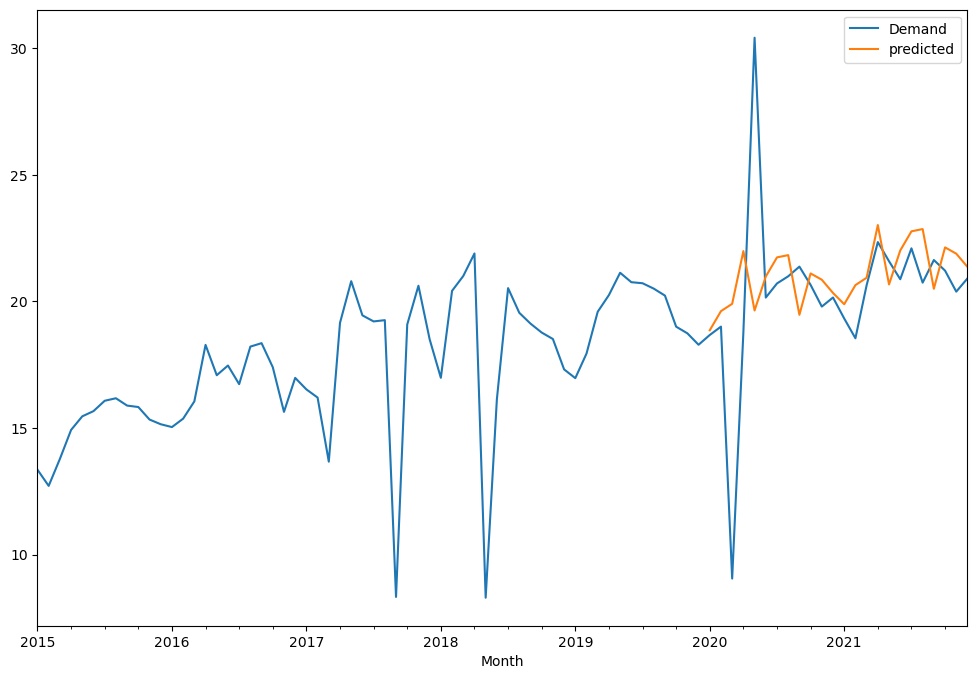

In [23]:
data['predicted']=results.predict(start=60,end=84,dynamic=True)
predicted=results.predict(start=60,end=83,dynamic=True)
data[['Demand','predicted']].plot(figsize=(12,8))
predicted

In [24]:
#For the future forecast
from pandas.tseries.offsets import DateOffset
future_dates =[data.index[-1]+ DateOffset(months=x) for x in range(0,24)]

In [25]:
future_dataset_data=pd.DataFrame(index=future_dates[1:],columns=data.columns)

In [26]:
future_dataset_data.tail()

,Demand,Temp_Avg,Temp_Max,Temp_Min,Rainfall_Avg,HumidityDay,HumidityNight,Electricty demand first difference,predicted
2023-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
future_data=pd.concat([data,future_dataset_data])

C:\Users\Shani\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<AxesSubplot:>

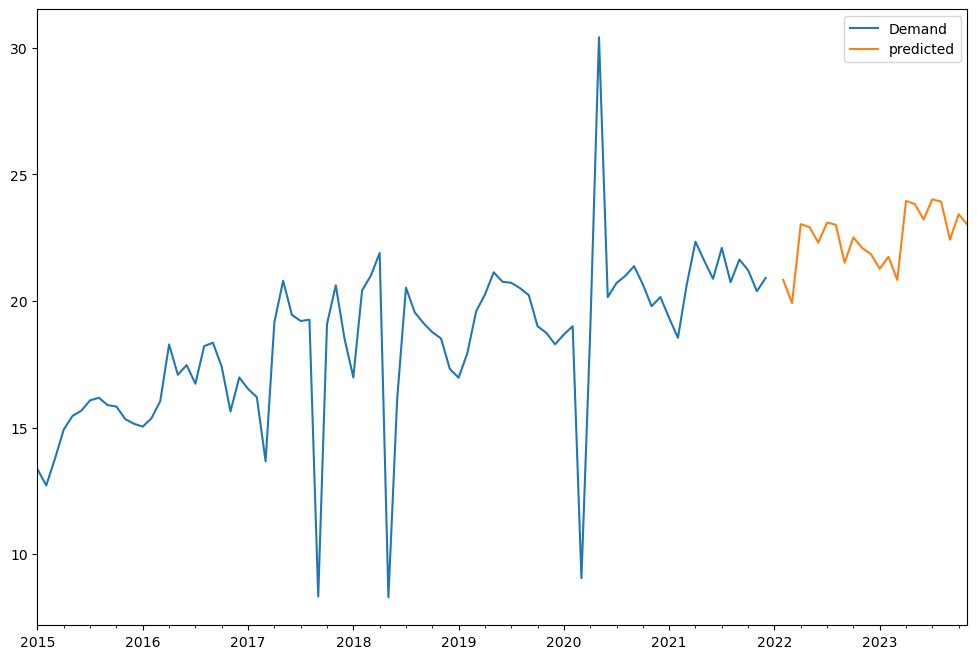

In [28]:
future_data['predicted']=results.predict(start=85,end=108,dynamic=True)
future_data[['Demand','predicted']].plot(figsize=(12,8))